In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Análisis exploratorio

In [2]:
df = pd.read_csv("./Resources/creditcard.csv")
df.shape

(284807, 31)

Nuestro dataset contiene 284807 operaciones de tarjetas de crédito (cada línea es una operación) durante dos días distintos de septiembre de 2013 y 31 columnas o features.

Ahora vamos a echar un primer vistazo a los datos.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


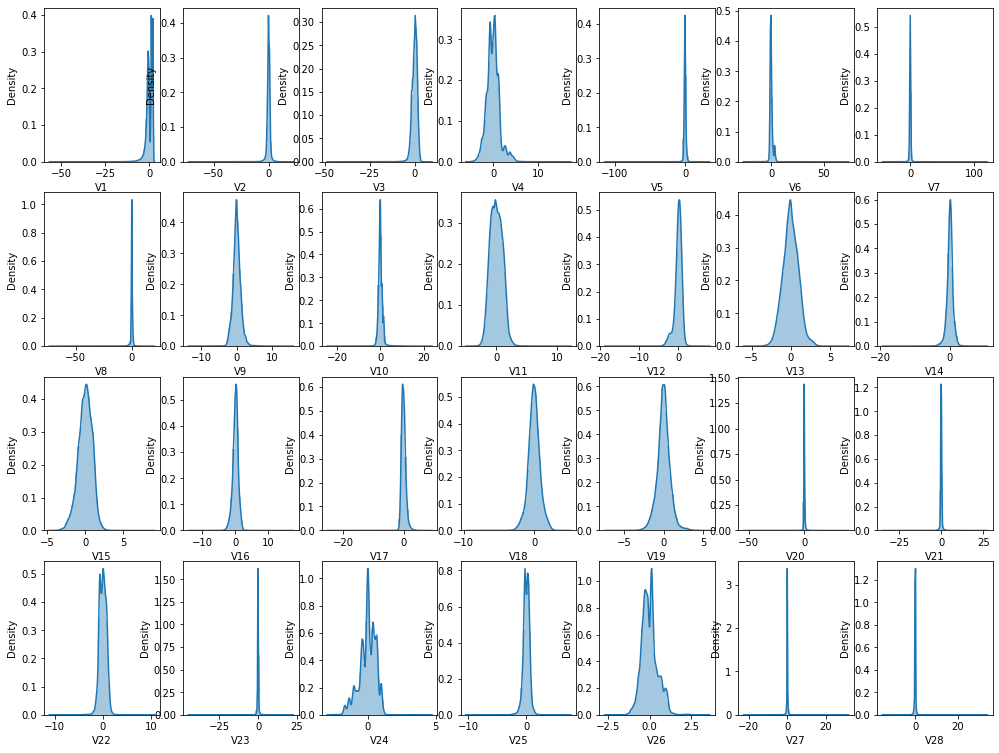

In [5]:
ncols = 7
nrows = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(17,13))

count = 0
for col in df.columns:
    if 'V' in col:
        sns.distplot(df[str(col)], ax=axs[count//ncols, count%ncols])
        count += 1

Atendiendo primero a las features/columnas 'Vx', la media de los valores correspondientes a estas es muy próxima a 0, lo cual se oberva muy bien en los gráficos de la figura de arriba. Por otro lado, algo que llama la atención es que la desviación típica (std) de estas features disminuye a medida que el número x aumenta, desde 1.96 a 0.33 aproximadamente. Además, fijándonos en los valores máximos y mínimos de estas columnas y en los ejes X de los gráficos vemos como existen algunos valores atípicos.

Con esta información podemos decir que los valores de estas columnas 'Vx' parecen seguir una **distribución normal**, es decir, la mayor parte de los valores se concentran en torno a la media, en una región muy reducida ya que la desviación típica es muy baja.

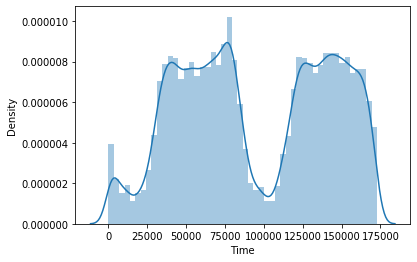

In [6]:
sns.distplot(df['Time'])

Viendo los valores de la columna 'Time' podríamos decir que se distribuyen aleatoriamente, aunque también es cierto que parecen agruparse en dos intervalos distintos que podrían corresponderse con las horas más activas de cada uno de los dos días.

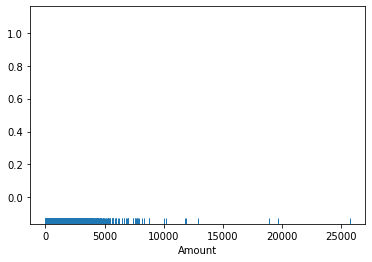

In [7]:
sns.rugplot(df['Amount'])

Si nos fijamos en la media (88.35) de los valores de la columna 'Amount', sus cuartiles: Q1 (5.6), Q2/mediana (22) y Q3 (77.17), y el gráfico de arriba, en el que cada raya marca un valor distinto, observamos que la mayoría de las operaciones de tarjetas de crédito se realizan con valores muy bajos, y que las operaciones con grandes 'amounts' (que las hay) representan menos del 25%.

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Centrándonos en la columna de la clase, vemos como sólo hay 2 valores (0 y 1) y como un 99.82% de los registros en el dataset se corresponden con la clase 0. Se trata entonces de un problema no balanceado, es decir, la clase 0 está sobrerepresentada en comparación con la clase 1.

Según esta información y suponiendo que las operaciones fraudulentas son las menos comunes, a partir de ahora vamos a considerar a la clase 1 como operación fraudulenta.

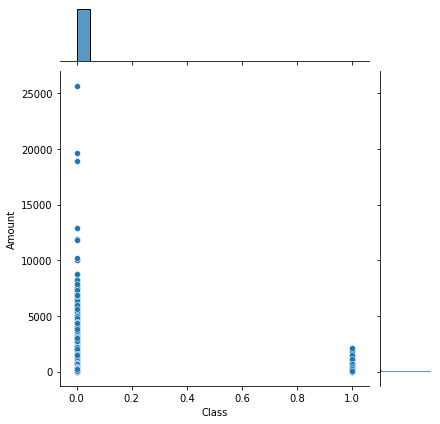

In [9]:
sns.jointplot(x='Class', y='Amount', data=df)

La figura de arriba compara el 'Amount' de las operaciones con la clase en busca de una relación directa entre ambas. A simple vista, de acuerdo con las operaciones de tarjetas de crédito en nuestro dataset, podemos observar como aquellas que operan con grandes cantidades ('Amount'), que recordemos son valores atípicos para esta columna, no están clasificadas como fraudulentas.

Para ver esto en más detalle con el resto de variables recurrimos a la matriz de correlación, la cual nos muestra la correlación, negativa o positiva, de cada una de las variables con la clase.

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


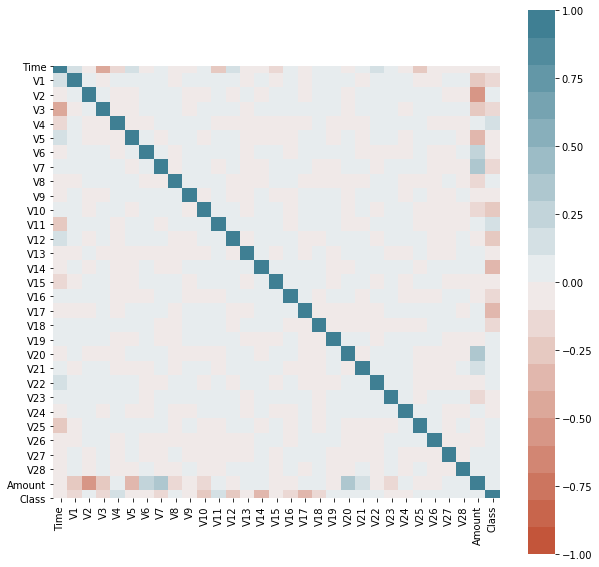

In [43]:
corr = df.corr()

print(corr['Class'])

_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=20), square=True, ax=ax)

Con la información de arriba observamos como, por ejemplo, las variables 'Time' y 'Amount' tienen una muy baja correlación con la clase. Sin embargo, otras variables como 'V14' y 'V17' guardan una mayor correlación (negativa) con la clase en comparación con el resto

## Preparación de los datos

**_PROBAR CON UN DATASET EN EL QUE SE HAYAN ELIMINADO LAS VARIABLES CON MUY BAJA CORRELACIÓN_**

**_PROBAR CON UN DATASET EN EL QUE SE MANTENGAN TODAS LAS VARIABLES, INCLUIDO EL TIEMPO_**

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Al buscar valores nulos no encontramos ninguno en el dataset.

In [11]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df_col):
    aux = df_col.to_numpy().reshape(-1,1)
    return RobustScaler().fit_transform(aux)

In [12]:
def z_score(df_col):
    return (df_col - df_col.mean()) / df_col.std()

In [13]:
def min_max_scaling(df_col):
    return (df_col - df_col.min()) / (df_col.max() - df_col.min())

In [48]:
df_copy = df.drop(columns=['Time'])
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Cuando hay features/columnas cuyos valores son muy grandes comparados con otras, estos valores pueden alterar el comportamiento de algunos algoritmos de ML.

En este caso he pensado en estandarizar los valores de la columna 'Amount'. Sin embargo, los valores atípicos pueden afectar negativamente a la media y la desviación típica. Para superar esto voy a probar una técnica conocida como Robust Scaling que usa la mediana y el rango intercuartílico.

0.0 25691.16
88.34961925087359 250.1201092402221
-0.30741284147278697 358.6831551736184
0.9271238629345306 3.4950060677738635


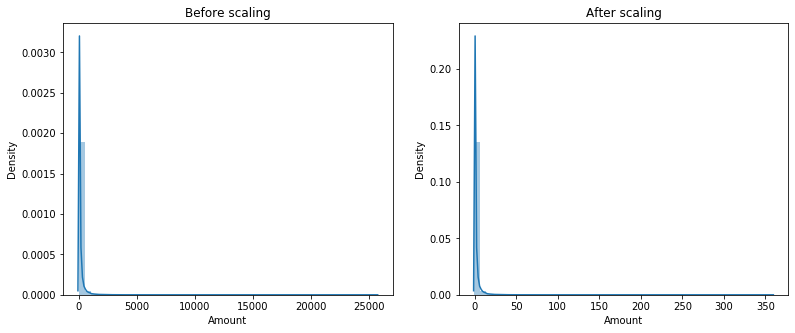

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(13,5))

axs[0].title.set_text("Before scaling")
print(df['Amount'].min(), df['Amount'].max())
print(df['Amount'].mean(), df['Amount'].std())
sns.distplot(df['Amount'], ax=axs[0])

axs[1].title.set_text("After scaling")
df_copy['Amount'] = robust_scaling(df_copy['Amount'])
print(df_copy['Amount'].min(), df_copy['Amount'].max())
print(df_copy['Amount'].mean(), df_copy['Amount'].std())
sns.distplot(df_copy['Amount'], ax=axs[1])

In [16]:
def plot_V_graphs(col):
    fig, axs = plt.subplots(1, 4, figsize=(17, 4))

    axs[0].title.set_text("Original")
    print(df[col].min(), df[col].max())
    print(df[col].mean(), df[col].std())
    sns.distplot(df[col], ax=axs[0])

    axs[1].title.set_text("Z-score")
    aux = z_score(df_copy[col])
    print(aux.min(), aux.max())
    print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[1])

    axs[2].title.set_text("Min-max")
    aux = min_max_scaling(df_copy[col])
    print(aux.min(), aux.max())
    print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[2])

    axs[3].title.set_text("Robust scaling")
    aux = robust_scaling(df_copy[col])
    print(aux.min(), aux.max())
    print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[3])

-56.407509631329 2.45492999121121
3.919560084655042e-15 1.9586958038574789
-28.798504351844418 1.2533492880193227
-2.369346569660883e-15 1.000000000000003
0.0 1.0
0.9582937777137208 0.03327581759128156
-25.234900685103014 1.0898053486906798
-0.008098692776059091 0.8759745782816649


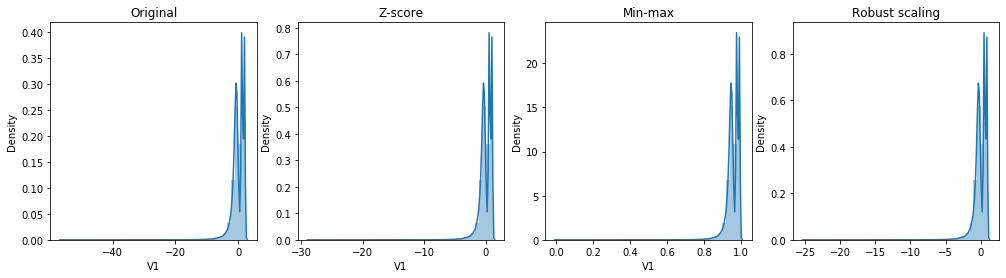

In [17]:
plot_V_graphs('V1')

-43.5572415712451 120.589493945238
-1.694249132734738e-15 1.2370935981826603
-35.20933390588426 97.47806804787348
1.6632790375964797e-15 1.0000000000000044
0.0 1.0
0.2653555151992079 0.007536510514754847
-38.77001447590587 107.20152031932322
-0.03566265589820811 1.1001140755014895


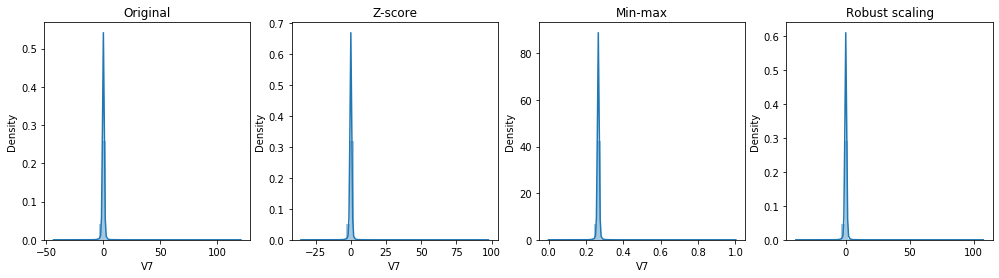

In [18]:
plot_V_graphs('V7')

Observando los gráficos obtenidos para estas dos variables se pueden realizar las siguientes afirmaciones:
- *Z-score* no cambia mucho los valores debido a que estas variables ya siguen una distribución normal de media 0 y desviación típica cercana a 1.
- Lo mismo acurre con *Robust scaling*, el único efecto de este método es reducir ligeramente los valores atípicos.
- *Min-max scaling* parece desvirtuar los valores de las variables concentrándolos en el 0 o 1 según los valores atípicos sean positivos o negativos respectivamente.

De este modo, se ha llegado a la conclusión de no escalar ni modificar la distribución de las variables V1,...,V28.

## Predicción

In [19]:
import tensorflow as tf

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Ya que el dataset contiene la clase de cada operación podemos aplicar algoritmos de **aprendizaje supervisado**, los cuales se basan en encontrar la relación entre unas variables de entrada y unas variables de salida. Dicho de otro modo, el aprendizaje se consigue mostrando a los algoritmos el resultado deseado con unos determinados valores de entrada.

In [20]:
# Extraer la clase
target = df_copy.pop('Class')

### Neural network model

El primer algoritmo que vamos a probar es una red neuronal profunda con 2 *hidden layers* y una única variable de salida a la que se le aplica la función de activación "sigmoid" (la misma que en una regresión logística). Esta función devuelve la probabilidad (entre 0 y 1) de que ocurra un evento, en este caso la probabilidad de que haya fraude.

También aplicamos "*Dropout*" como una técnica de regularización que consiste en poner a 0 (*dropping out*) aleatoriamente un porcentaje de las variables de salida de una capa, en este caso un 20%. Esto se hace únicamente durante el entrenamiento del modelo.

De este modo, dividimos el dataset en tres conjuntos que mantengan la misma proporción de clases (*stratification*), utilizando un 70% del dataset original para entrenar el modelo y un 15% para los datos validación y evaluación respectivamente. 

In [21]:
X_train, X_aux, y_train, y_aux = train_test_split(df_copy, target, stratify=target, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, stratify=y_aux, test_size=0.5)

In [22]:
input_dim = X_train.shape[1]
print(f"Variables de entrada: {input_dim}")

def create_NN_model():
    new_model = tf.keras.Sequential([
        layers.Dense(64, input_dim=input_dim, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])

    new_model.compile(
        loss=losses.BinaryCrossentropy(from_logits=True),  # Ya que se trata de un problema de clasificacion binario
        optimizer='adam',
        metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

    return new_model

Variables de entrada: 29


In [23]:
nn_model = create_NN_model()
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = nn_model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
6231/6231 [==============================] - 9s 1ms/step - loss: 0.6938 - binary_accuracy: 0.9978 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 2/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 3/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 4/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 5/5
6231/6231 [==============================] - 8s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983


In [25]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(loss, accuracy)

1336/1336 [==============================] - 1s 635us/step - loss: 0.6932 - binary_accuracy: 0.9983
0.6931594610214233 0.9982678890228271


In [26]:
y_pred = nn_model.predict(X_test)
y_pred = np.round(y_pred)  # Class 0: <= 0.5 | Class 1: > 0.5

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     42648
      Fraude       0.00      0.00      0.00        74

    accuracy                           1.00     42722
   macro avg       0.50      0.50      0.50     42722
weighted avg       1.00      1.00      1.00     42722



array([[42648,     0],
       [   74,     0]])

Si nos fijamos únicamente en el valor de la "*accuracy*" podríamos pensar que nuestro modelo tiene un muy buen rendimiendo. Sin embargo, como podemos ver en el "*classification report*" y la "*confusion matrix*", estos resultados son engañosos.

Debido a que la clase 0 ("No fraude") está sobrepresentada en nuestra muestra, es decir, las clases no están balanceadas, el modelo ha aprendido a predecir cualquier operación como "No fraude" obteniendo así una "*accuracy*" del 99.83%. Por lo tanto, este modelo no soluciona el problema ya que no sirve para encontrar las operaciones fraudulentas que es, en realidad, nuestro objetivo.

### Logistic regression

En este aparatado probamos el algoritmo de regresión logística, un método de ML muy usado en la predicción de clases binarias, como es nuestro caso. Este método proporciona un resultado discreto a partir de la función *sigmoid*, la cual ya hemos descrito anteriormente.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_copy, target, stratify=target, test_size=0.2)

In [28]:
lg_model = LogisticRegression().fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.90      0.65      0.76        98

    accuracy                           1.00     56962
   macro avg       0.95      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



array([[56857,     7],
       [   34,    64]])

Sabiendo que el valor de la *accuracy* no es muy fiable para este problema, nos centraremos en el "informe de clasificación" y en la "matriz de confusión" para evaluar el rendimiento del modelo.

El informe de clasificación contiene algunas métricas interesantes como la *precision*, que representa la proporción de casos clasificados como positivos que realmente lo son, el *recall* (exhaustividad), que representa la cantidad/fracción de los casos positivos que el modelo es capaz de clasificar correctamente, y el *f1-score*, que combina las dos medidas anteriores en un solo valor asumiendo que tienen la misma importancia.

Por otro lado, la matriz de confusión nos permite ver cómo se han clasificado las operaciones de cada clase ("No fraude" y "Fraude"), de donde podemos extraer información como el número de *verdaderos positivos* (TP), *falsos positivos* (FP), *verdaderos negativos* (TN) y *falsos negativos* (FN), los cuales sirven para calcular la *precision* y el *recall*.

Después de ejecutar el modelo sin aplicar ningún cambio en los *datasets* observamos como ahora no todas las operaciones se clasifican como "No fraude", y los valores de la *precision* y el *recall* para la clase "Fraude" son 0.85 y 0.67 respectivamente.

**Para este problema es más importante el _recall_ que la _precision_**, ya que es mejor detectar la mayoría de las operaciones fraudulentas, aunque esto conlleve aumentar los falsos positivos, que tener una gran precisión en nuestras prediciones a costa de saltarnos una gran parte de las operaciones fraudulentas.

#### Penalización

Una primera estrategia para intentar ajustar el rendimiento de nuestro modelo a nuestro gusto puede ser la aplicación de una penalización o coste adicional por los errores de clasificación en la clase minoritaria durante la fase de entrenamiento. Esto puede hacer que el modelo ponga más atención a la clase menos representada.

Según la documentación de Scikit-learn, el modo "balanceado" usa los valores de 'y' para ajustar automaticamente los parámetros (weights) del model de manera inversamente proporcional a la frecuencia de clases en los datos de entrada.

In [29]:
lg_model_balanced = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
y_pred = lg_model_balanced.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.98      0.99     56864
      Fraude       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



array([[55498,  1366],
       [    8,    90]])

En este caso, observamos como el valor del *recall* para la clase "Fraude" ha aumentado hasta el 0.95, ya que de un total de 98 operaciones fraudulentas sólo 5 han sido falsos negativos. Como aspecto negativo, un "pequeño" porcentaje de las operaciones no fraudulentas han sido clasificadas como "Fraude", disminuyendo en gran medida la precisión de la clase "Fraude". Sin embargo, como ya hemos dicho antes esta situación es más conveniente para este problema.

#### Modificar el dataset para tener las clases más balanceadas

Podemos probar dos estrategias diferentes: una sería añadir copias de operaciones (registros) de la clase menos representada (*over-sampling*) y la otra, eliminar operaciones de la clase sobrerepresentada (*under-sampling*).

En relación a la primera, hay que tener en cuenta que esta estrategia puede incrementar las posibilidades de sufrir *overfitting* ya que estamos rellenando el *dataset* con duplicados, lo que podría resultar en una menor capacidad de generalización del modelo. Vamos a ver los resultados que obtenemos si aplicamos **_over-sampling_**.

In [30]:
X_ros, y_ros = RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_ros.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    227451
1    113725
Name: Class, dtype: int64


In [31]:
lg_model_ros = LogisticRegression().fit(X_ros, y_ros)
y_pred = lg_model_ros.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.99      0.99     56864
      Fraude       0.11      0.91      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



array([[56155,   709],
       [    9,    89]])

Con esta estrategia podemos ver como el *recall* mantiene aproximadamente el mismo valor que con la estrategia anterior, aunque en este caso la precisión es mayor, lo cual supone una ligera mejoría.

Después de realizar algunas pruebas con distintos valores he notado que al aumentar la proporción del número de operaciones fraudulentas en relación con las no fraudulentas (el parémetro "*sampling_strategy*"), el *recall* también aumenta mientras que la precisión disminuye, acercándose así al comportamiento obtenido con la estrategia de penalización. Lo mismo ocurre a la inversa.

Vamos a probar ahora aplicando la técnica de **_under-sampling_**.

In [32]:
X_rus, y_rus = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_rus.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    788
1    394
Name: Class, dtype: int64


In [33]:
lg_model_rus = LogisticRegression().fit(X_rus, y_rus)
y_pred = lg_model_rus.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.98      0.99     56864
      Fraude       0.08      0.92      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



array([[55828,  1036],
       [    8,    90]])

Manteniendo la misma proporción de las clases que en la estrategia anterior, observamos como el *recall* se mantiene más o menos igual. Sin embargo, el número de falsos positivos para la clase "Fraude" ha aumentado en comparación la técnica de *over-sampling*.